# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import Important Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
# Few nice colors
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
COLOR6 = '#2c7fb8'
COLOR7 = '#d95f0e'
COLOR8 = '#31a354'
COLOR9 = '#fdae6b'
COLOR10 = '#f03b20'

# Green shades
COLOR11 = '#edf8e9'
COLOR12 = '#bae4b3'
COLOR13 = '#74c476'
COLOR14 = '#31a354'
COLOR15 = '#006d2c'

# Blue shades
COLOR16 = '#eff3ff'
COLOR17 = '#bdd7e7'
COLOR18 = '#6baed6'
COLOR19 = '#3182bd'
COLOR20 = '#08519c'

# Red shades
COLOR21 = '#fee5d9'
COLOR22 = '#fcae91'
COLOR23 = '#fb6a4a'
COLOR24 = '#de2d26'
COLOR25 = '#a50f15'

In [3]:
# seaborn settings
sns.set_palette('deep', desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

In [4]:
# import data into pandas
dfBodyTemp = pd.read_csv('C:/MyBriefCase/SpringBoard/CapstoneProject/Human Body Temperature/human_temp/data/human_body_temperature.csv')
dfBodyTemp.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


##### The normal (Gaussian) probability density function (PDF) of human body temperatures

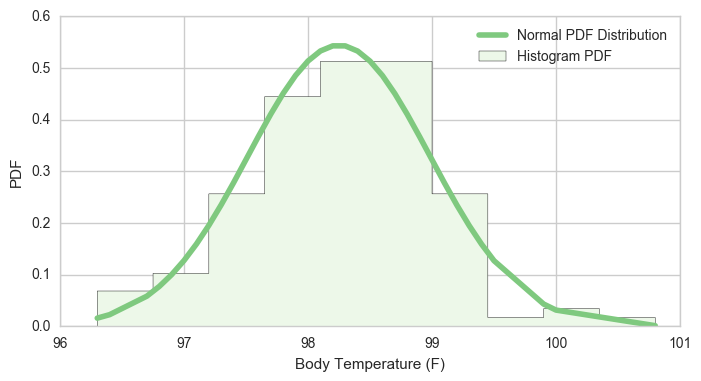

In [5]:
dfBodyTemp = dfBodyTemp.sort_values(['temperature'])

dfmean = np.mean(dfBodyTemp['temperature'])
dfstd = np.std(dfBodyTemp['temperature'], ddof = 1)

xs = np.linspace(90, 110, 10)
ys = ss.norm.pdf(dfBodyTemp['temperature'], dfmean, dfstd)
plt.plot(dfBodyTemp['temperature'], ys, linewidth=4, color=COLOR1, label = 'Normal PDF Distribution')
#plt.hist(dfBodyTemp['temperature'], color=COLOR2)
plt.hist(dfBodyTemp['temperature'], normed=True, histtype='stepfilled', color = COLOR11, label = 'Histogram PDF')
plt.legend(loc='best', frameon=False)
plt.xlabel('Body Temperature (F)')
plt.ylabel('PDF')

1. The above picture suggests that the distribution of body temperatures is normal. 

##### The normal (Gaussian) probability density function (PDF) of human body temperatures for Male

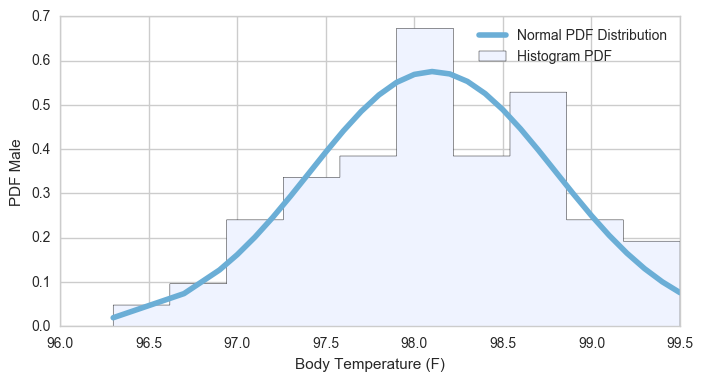

In [6]:
dfBodyTemp = dfBodyTemp.sort_values(['temperature'])

dfBodyTempM = dfBodyTemp[dfBodyTemp['gender'] == 'M']

dfmeanM = np.mean(dfBodyTempM['temperature'])
dfstdM = np.std(dfBodyTempM['temperature'])

xs = np.linspace(90, 110, 10)
ys = ss.norm.pdf(dfBodyTempM['temperature'], dfmeanM, dfstdM)
plt.plot(dfBodyTempM['temperature'], ys, linewidth=4, color=COLOR18, label = 'Normal PDF Distribution')
#plt.hist(dfBodyTemp['temperature'], color=COLOR2)
plt.hist(dfBodyTempM['temperature'], normed=True, histtype='stepfilled', color = COLOR16, label = 'Histogram PDF')
plt.legend(loc='best', frameon=False)
plt.xlabel('Body Temperature (F)')
plt.ylabel('PDF Male')

##### The normal (Gaussian) probability density function (PDF) of human body temperatures for Female

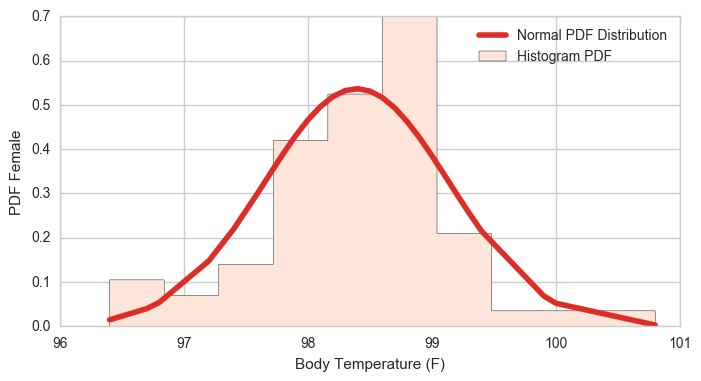

In [7]:
dfBodyTemp = dfBodyTemp.sort_values(['temperature'])
dfBodyTempF = dfBodyTemp[dfBodyTemp['gender'] == 'F']

dfmeanF = np.mean(dfBodyTempF['temperature'])
dfstdF = np.std(dfBodyTempF['temperature'], ddof=1)

xs = np.linspace(90, 110, 10)
ys = ss.norm.pdf(dfBodyTempF['temperature'], dfmeanF, dfstdF)
plt.plot(dfBodyTempF['temperature'], ys, linewidth=4, color=COLOR24, label = 'Normal PDF Distribution')

plt.hist(dfBodyTempF['temperature'], normed=True, histtype='stepfilled', color = COLOR21, label = 'Histogram PDF')
plt.legend(loc='best', frameon=False)
plt.xlabel('Body Temperature (F)')
plt.ylabel('PDF Female')

2. Yes the sample size is large and the observations are independent to each other. Considering large sample size with normal distribution of sample data as shown above, we can assume that sample is true representation of population meaning population would be normally distributed. 

The reading of body temperature of male is independent of the reading of body temperature of female because the values in Male sample doesn't affect the values in female sample and vice-versa. And moreover the values in one sample (Male) reveal no information about those of the other sample (Female).

3. While determing the true/mean normal body temperature of human body we are **not** trying to distinguish between the readings of body temperature from the sample of male and female. We would like to estimate/validate the mean normal body temperature of the population by comparing it to the target value (98.6 F) where we don't know the standard deviation of the population. Hence we are going to apply 2-sided/tailed 1-Sample t-test(t-stat). Here we are considering 2-tailed probability so that extreme value from either end can be dis-regarded.

In [8]:
dfBodyTemp.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1-Sample t-test

##### The Sample Mean and Standard Deviation

In [9]:
SMean = np.mean(dfBodyTemp['temperature'])
SStd = np.std(dfBodyTemp['temperature'], ddof=1)
SSize = len(dfBodyTemp['temperature'])
SMean, SStd, SSize

(98.24923076923076, 0.7331831580389453, 130)

##### The Standard Error. Formula = Population SD / Sqrt(N) where N = sample size.  
     As sample size is large we can assume Population SD is approximately same as Sample SD 

In [10]:
SE = SStd/np.sqrt(SSize)
SE

0.064304416837890996

With 95% confidence level we would like to determine Margin of Error using t-stat table. The critical t value with 130 - 1 = 129 degree of freedom (sample size = 130) is 1.984. 

##### The Margin of Error 

In [11]:
tCVal = 1.984
MOE = tCVal * SE
MOE

0.12757996300637572

##### The 95% Confidence Interval for the sample mean 
###### The lower-end of the interval is

In [12]:
CIL = SMean - MOE

###### The upper-end of the interval is

In [13]:
CIU = SMean + MOE
CIL, CIU

(98.121650806224395, 98.376810732237132)

With 95% confidence, the average temperature of human body of the entire population is between 98.12 F and 98.37 F, based on the sample data.  Body temperature below 98.12 F and beyond 98.37 would be treated as 'Abnormal' per the available sample data.

### Hypothesis Testing with 1% Significance Level

##### Null Hypothesis (H0): The population mean (MU) equals the hypothesized mean (MUh). MU = MUh

##### Alternative Hypothesis (H1): The population mean (MU) differs from the hypothesized mean (MUh). MU != MUh

In [14]:
# Here MUh is 98.6 F
MUh = 98.6

###### Assume H0 is true then MU = MUh.  Get T-value.

In [15]:
MU = MUh
tval = (SMean - MU)/SE
tval

-5.454823292364301

##### Now H0 can only be rejected if probability of getting SMean is less than 1%, assuming H0 is true

Using the T-stat table the critical t value with 99% confidence level and (130 - 1) = 129 degree of freedom (sample size = 130) is 2.626

In [16]:
tCVal = 2.626
tdiff = abs(tval) - tCVal
tdiff

2.8288232923643011

### Conclusion: 1-Sample test 
tdiff is > 0 means assuming H0 is true probability of getting SMean is < 1% on either side of the tail. Hence, we can reject the H0 in favor of H1. It means the population mean differs from the hypothesized mean (98.6 F). It is now statistically proven with the provided sample data that the mean normal body temperature of the population is within the range of 98.12F and 98.37F much lower than 98.6F since it was first conceptualized.

## 2-Sample Test
#### Here we are trying to compare the mean body temperature of 2 groups, Male and Female

##### The Sample (Only Male) Mean and Standard Deviation

In [17]:
dfBodyTempM.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [18]:
SMMean = np.mean(dfBodyTempM['temperature'])
SMStd = np.std(dfBodyTempM['temperature'], ddof=1)
SMSize = len(dfBodyTempM['temperature'])
SMMean, SMStd, SMSize

(98.1046153846154, 0.6987557623265904, 65)

##### The Standard Error of Male

In [19]:
SEM = SMStd/np.sqrt(SMSize)
SEM

0.086669985522858678

##### The Sample (Only Female) Mean and Standard Deviation

In [20]:
dfBodyTempF.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [21]:
SFMean = np.mean(dfBodyTempF['temperature'])
SFStd = np.std(dfBodyTempF['temperature'], ddof=1)
SFSize = len(dfBodyTempF['temperature'])
SFMean, SFStd, SFSize

(98.39384615384616, 0.7434877527313662, 65)

##### The Standard Error of Female

In [22]:
SEF = SFStd/np.sqrt(SFSize)
SEF

0.092218306080362064

##### The difference of Mean between 2 groups is 

In [23]:
SDMean = SFMean - SMMean
SDMean

0.2892307692307554

##### The Variance of difference of Mean between 2 groups is the sum of variance of individual groups.  
    The Standard Error of difference of Mean between Male and Female where Mean of a group is calculated by Sampling distribution of sampling mean is square-root of sum of square of Standard Error(SE) of Male and square of Standard Error(SE) of Female 

In [24]:
SED = np.sqrt(np.square(SEM) + np.square(SEF))
SED

0.12655395041982639

With 95% confidence level we would like to determine Margin of Error using z-stat table. The critical z value with 2-tailed distribution is 1.96. 

##### The Margin of Error of difference of Mean between 2 groups

In [25]:
zCVal = 1.96
MOED = zCVal * SED
MOED

0.24804574282285974

##### The 95% Confidence Interval for the difference of Mean between 2 groups
###### The lower-end of the interval is

In [26]:
CILD = SDMean - MOED

###### The upper-end of the interval is

In [27]:
CIUD = SDMean + MOED
CILD, CIUD

(0.041185026407895675, 0.53727651205361515)

With 95% confidence, the difference of average normal body temperature between Male and Female for the entire population is between 0.041 F and 0.537 F, based on the sample data. The difference is in fraction not significant.

### Hypothesis Testing with 1% Significance Level

##### Null Hypothesis (H0): The population mean of Male (MUM) differs significantly from the population mean of Female (MUF).  MUM != MUF

##### Alternative Hypothesis (H1): The population mean of Male (MUM) equals to the population mean of Female (MUF). MUM = MUF

Using the Z-stat table the critical z value with 99% confidence level and 2-tail distribution is 2.58

In [28]:
zCVal = 2.58

** The critical distance from mean (the difference of mean between 2 groups) **

In [29]:
distFrMean = zCVal * SED
distFrMean

0.3265091920831521

Assuming H0 is true, we are considering the max difference between MUM and MUF. The difference would be abs(MUM - MUF) = CIUD = 0.537276512

In [32]:
distDiff = CIUD - distFrMean
distDiff

0.21076731997046305

### Conclusion: 2-Sample test 
distDiff is > 0 means the max difference of sample means of 2 groups per the sample data falls in the critical region. Assuming that the H0 is correct the probability of getting such result is less than 1%. Hence, we can reject the H0. It means the difference of average normal body temperature between Male and Female for the entire population is negligible and can be ignored as this doesn't have any practical significance.